### 전체 흐름
    - Part0: modules
    - Part1: Price Universe
    - Part2: Factors
    - Part3: Factor Correlation
    - Part4: Cross Sectional Allocation
    - Part5: Time Series Allocation
    - Part6: Market Regime
    - Part7: Backtest

### Part0: import modules

In [1]:
# path 설정
import sys
sys.path.append('/Users/jtchoi/Library/CloudStorage/GoogleDrive-jungtaek0227@gmail.com/My Drive/quant/Quant-Project/quant/')

# 제작한 모듈들 임포트
from price.price_processing import *
from strategy.factors.Momentum import MomentumFactor
from strategy.optimize.CrossSectional import *
from strategy.optimize.TimeSeries import *

# S&P500에 속한 기업들 티커를 받기 위한 모듈 임포트
import bs4 as bs
import requests
import yfinance as yf
import datetime

# 기타 모듈 임포트
import matplotlib.pyplot as plt
from collections import Counter
import datetime as dt
import seaborn as sns
sns.set()

### Part1: 가격 데이터
  - S&P500을 구성하는 502개 미국기업
    - 아래 방법으로 데이터 다운로드 가능
    - 만들어둔 get_price 함수 사용 위해서는 추가 작업 필요(논의)
  - 데이터 다운로드 이후 csv 파일로 저장한 상태. 매번 데이터 다운로드 받을 필요없이 저장한 데이터 사용하는 것도 방법일듯(논의)
  - 시작일시: 2000.01.01 -> 2008 경제위기에 투자전략의 성과를 볼 수 있기 때문에 결정
    - 시차가 반영되 한국시간 기준으로 날짜가 찍혀있다.
    - 2000.01.01 기준으로 365개의 기업만 수정종가 데이터 존재. (기간 재설정할 것인지는 논의)
  
  

In [2]:
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers_list = [s.replace('\n', '') for s in tickers]

In [3]:
# start = datetime.datetime(2000,1,1)
# end = datetime.datetime(2021,12,31)
# df = yf.download(tickers_list, start=start, end=end)
# price_universe = df['Adj Close']

# price_universe.index = pd.to_datetime(pd.to_datetime(price_universe.index).date)
# price_universe.index.name = 'date_time'

# price_universe

#price_universe.to_csv('price_universe.csv')

In [4]:
price_universe = pd.read_csv('/Users/jtchoi/Library/CloudStorage/GoogleDrive-jungtaek0227@gmail.com/My Drive/quant/Quant-Project/quant/price_universe.csv', index_col=0)
price_universe.index = pd.to_datetime(pd.to_datetime(price_universe.index).date)
price_universe.index.name = 'date_time'
price_universe

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date_time,,,,,,,,,,,,,,,,,,,,,
2000-01-03,44.001263,NaN,NaN,0.851942,NaN,2.998109,9.221025,1.277778,NaN,16.274673,...,NaN,7.294349,19.130630,6.772069,NaN,4.792224,NaN,25.027779,37.955727,NaN
2000-01-04,40.640060,NaN,NaN,0.780115,NaN,2.793419,8.957571,1.270833,NaN,14.909400,...,NaN,7.462309,18.764210,6.772069,NaN,4.695898,NaN,24.666668,36.117786,NaN
2000-01-05,38.119156,NaN,NaN,0.791530,NaN,3.010150,8.941103,1.388889,NaN,15.204175,...,NaN,7.750242,19.787148,6.889138,NaN,4.719979,NaN,25.138889,36.075054,NaN
2000-01-06,36.667725,NaN,NaN,0.723033,NaN,3.238922,9.253956,1.375000,NaN,15.328291,...,NaN,7.678262,20.810101,6.898143,NaN,4.679845,NaN,23.777779,36.587952,NaN
2000-01-07,39.723366,NaN,NaN,0.757282,NaN,3.660343,9.352753,1.451389,NaN,16.072985,...,NaN,7.678262,20.749022,6.880131,NaN,4.575489,NaN,23.513889,36.673450,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,156.562347,18.260000,224.063004,175.262802,131.723129,127.924423,136.246521,43.480000,396.261078,569.619995,...,88.879997,64.804298,58.691692,54.536747,117.112770,132.787628,122.040512,582.409973,60.688782,240.743683
2021-12-27,157.494980,18.170000,228.281128,179.289444,133.029587,130.265030,138.498352,43.930000,408.070984,577.679993,...,87.580002,65.008598,59.528500,55.048370,117.900162,135.407288,123.061127,606.330017,61.321358,244.714554
2021-12-28,157.931503,18.540001,229.854507,178.255447,133.009781,130.719345,137.529068,44.270000,408.012024,569.359985,...,86.459999,65.786919,59.336132,55.127075,119.126106,135.377853,123.446266,597.320007,61.418682,242.471024


In [5]:
price_in_use = price_universe.dropna(axis=1)
price_in_use

,A,AAPL,ABC,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,...,WMT,WRB,WST,WY,XEL,XOM,XRAY,YUM,ZBRA,ZION
date_time,,,,,,,,,,,,,,,,,,,,,
2000-01-03,44.001263,0.851942,2.998109,9.221025,1.277778,16.274673,29.116415,6.623757,25.491167,8.052905,...,44.220280,1.073165,5.443912,12.230904,7.294349,19.130630,6.772069,4.792224,25.027779,37.955727
2000-01-04,40.640060,0.780115,2.793419,8.957571,1.270833,14.909400,27.643436,6.554756,25.491167,7.660816,...,42.565636,1.040144,5.500152,11.771424,7.462309,18.764210,6.772069,4.695898,24.666668,36.117786
2000-01-05,38.119156,0.791530,3.010150,8.941103,1.388889,15.204175,28.046978,6.451264,25.246052,7.178245,...,41.696957,1.023634,5.477655,12.395006,7.750242,19.787148,6.889138,4.719979,25.138889,36.075054
2000-01-06,36.667725,0.723033,3.238922,9.253956,1.375000,15.328291,27.280241,6.485761,25.583080,6.740915,...,42.151989,1.083071,5.421417,12.974822,7.678262,20.810101,6.898143,4.679845,23.777779,36.587952
2000-01-07,39.723366,0.757282,3.660343,9.352753,1.451389,16.072985,28.046978,6.589257,26.165209,7.540174,...,45.337170,1.066561,5.477655,12.548164,7.678262,20.749022,6.880131,4.575489,23.513889,36.673450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,156.562347,175.262802,127.924423,136.246521,43.480000,569.619995,169.451706,64.221046,237.479584,280.989990,...,137.331238,53.446667,458.730621,36.561798,64.804298,58.691692,54.536747,132.787628,582.409973,60.688782
2021-12-27,157.494980,179.289444,130.265030,138.498352,43.930000,577.679993,172.209473,64.839317,241.689453,284.299988,...,138.581589,54.240002,464.766052,37.526936,65.008598,59.528500,55.048370,135.407288,606.330017,61.321358
2021-12-28,157.931503,178.255447,130.719345,137.529068,44.270000,569.359985,171.139740,65.683289,241.473557,282.769989,...,140.570328,54.646667,463.748505,37.716179,65.786919,59.336132,55.127075,135.377853,597.320007,61.418682


In [6]:
target_rebal = rebal_dates(price_in_use, 'month')
target_rebal

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31',
               ...
               '2021-03-31', '2021-04-30', '2021-05-28', '2021-06-30',
               '2021-07-30', '2021-08-31', '2021-09-30', '2021-10-29',
               '2021-11-30', '2021-12-30'],
              dtype='datetime64[ns]', length=264, freq=None)

In [7]:
rebal_price_df = price_on_rebal(price_in_use, target_rebal)
rebal_price_df

,A,AAPL,ABC,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,...,WMT,WRB,WST,WY,XEL,XOM,XRAY,YUM,ZBRA,ZION
2000-01-31,40.449066,0.789628,3.491774,8.621022,1.625000,13.668242,30.185827,6.485761,23.254566,7.388476,...,36.236637,0.917968,5.598465,10.112424,7.390327,20.245190,7.132285,3.676447,26.305555,40.654953
2000-02-29,63.480991,0.872397,2.805461,8.736851,1.694444,25.319607,50.767059,5.577534,21.354980,10.803191,...,32.265503,0.848625,5.327025,9.043900,6.742473,18.500908,7.384439,3.419575,29.583332,36.486298
2000-03-31,63.557396,1.033652,2.889745,9.315999,1.819444,27.638033,51.977737,5.716106,23.700802,10.999612,...,37.441933,1.233480,4.580563,10.046330,7.630270,19.161095,8.195107,3.989507,22.222221,28.621754
2000-04-28,54.161274,0.944224,3.852993,10.227496,1.710069,30.027847,49.596764,5.508248,26.433161,9.289759,...,36.696415,1.129854,4.454188,9.407414,8.522751,19.084332,8.393666,4.350730,25.333332,28.535812
2000-05-31,44.994358,0.639313,4.671754,10.826180,1.666667,27.948400,49.717850,6.649063,27.016459,9.002289,...,38.187458,1.179996,4.283309,8.811905,8.644854,20.577227,8.862992,3.764745,21.333332,32.276405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,173.877243,150.733902,120.253433,123.248405,41.099998,663.700012,159.311920,58.556961,203.298798,310.089996,...,145.223282,49.105209,450.334198,33.279434,65.976326,51.744308,60.593929,128.051147,587.169983,56.020702
2021-09-30,156.100082,140.478500,117.537613,115.211960,38.180000,575.719971,163.740784,58.566719,195.314774,285.170013,...,136.672653,47.845081,423.331329,33.036564,60.390800,55.825390,57.114521,119.529381,515.419983,59.881195
2021-10-29,156.254791,148.718582,120.066475,126.191521,41.820000,650.359985,169.616623,62.694988,219.318817,317.609985,...,146.517624,52.042477,428.656128,33.646198,62.410267,61.187737,56.288063,122.099602,533.950012,60.945492
2021-11-30,149.716446,164.346176,114.315231,123.136833,40.380001,669.849976,176.225677,61.051208,225.571381,254.190002,...,137.898376,50.107231,441.592072,35.426468,61.579288,57.556721,47.954556,120.523369,588.780029,61.389484


### Part2: factors

##### test with segemant data 

In [8]:
test_rebal_price_df = rebal_price_df.loc['2010-01-01':, ['A', 'AAPL', 'ABC', 'ABT']]
#display(test_rebal_price_df)

test_mt_factor = MomentumFactor(rebal_price=test_rebal_price_df, lookback_window=1, n_sel=30)
test_rel_signal = test_mt_factor.dual_momentum()
display(test_rel_signal)

,A,AAPL,ABC,ABT
2010-02-26,1,1,1,1
2010-03-31,1,1,1,0
2010-04-30,1,1,1,0
2010-05-28,0,0,1,0
2010-06-30,0,0,1,0
...,...,...,...,...
2021-08-31,1,1,1,1
2021-09-30,0,0,0,0
2021-10-29,1,1,1,1
2021-11-30,0,1,0,0


### Part3: Factor Correlation -> to do

In [9]:
# equity_beta = Equalizer(signal=test_rel_signal, rebal_price=test_rebal_price_df, param=12).beta()

# rets = rebal_price_df.pct_change().fillna(0)
# port_rets = equity_beta.shift() * rets
# eb_port_cum_rets = (1 + port_rets.sum(axis=1)).cumprod() - 1
# eb_port_cum_rets

# equity_momentum = Equalizer(signal=test_rel_signal, rebal_price=test_rebal_price_df, param=12).ew()

# rets = rebal_price_df.pct_change().fillna(0)
# port_rets = equity_momentum.shift() * rets
# em_port_cum_rets = (1 + port_rets.sum(axis=1)).cumprod() - 1
# em_port_cum_rets

# factor_df = pd.concat([eb_port_cum_rets, em_port_cum_rets], axis=1, join='inner')
# factor_df.index = equity_beta.index
# factor_df = factor_df.rename(columns={0: 'beta', 1: 'momentum'})
# factor_df
# sns.heatmap(factor_df.corr(), annot=True)

# # 그래프
# plt.figure(figsize=(12, 6))
# em_port_cum_rets.cumsum().plot(label='Factor Portfolio')
# eb_port_cum_rets.cumsum().plot(label='Beta Portfolio')
# plt.legend()
# plt.show()

### Part4: Cross Sectional
    - beta -> 완료
    - ew -> 완료  
    - emv -> 완료
    - msr -> 완료
    - gmv -> 완료
    - mdp -> 완료
    - rp -> 완료

In [10]:
test_ew_weight = Equalizer(signal=test_rel_signal, rebal_price=test_rebal_price_df, param=12)

In [11]:
beta = test_ew_weight.beta()
beta.dropna(inplace=True)
beta

,A,AAPL,ABC,ABT
2010-02-26,0.25,0.25,0.25,0.25
2010-03-31,0.25,0.25,0.25,0.25
2010-04-30,0.25,0.25,0.25,0.25
2010-05-28,0.25,0.25,0.25,0.25
2010-06-30,0.25,0.25,0.25,0.25
...,...,...,...,...
2021-08-31,0.25,0.25,0.25,0.25
2021-09-30,0.25,0.25,0.25,0.25
2021-10-29,0.25,0.25,0.25,0.25
2021-11-30,0.25,0.25,0.25,0.25


In [12]:
ew_weight = test_ew_weight.ew()
ew_weight.dropna(inplace=True)
ew_weight

,A,AAPL,ABC,ABT
2010-02-26,0.250000,0.250000,0.250000,0.25
2010-03-31,0.333333,0.333333,0.333333,0.00
2010-04-30,0.333333,0.333333,0.333333,0.00
2010-05-28,0.000000,0.000000,1.000000,0.00
2010-06-30,0.000000,0.000000,1.000000,0.00
...,...,...,...,...
2021-07-30,0.250000,0.250000,0.250000,0.25
2021-08-31,0.250000,0.250000,0.250000,0.25
2021-10-29,0.250000,0.250000,0.250000,0.25
2021-11-30,0.000000,1.000000,0.000000,0.00


In [13]:
emv_weight = test_ew_weight.emv()
emv_weight.dropna(inplace=True)
emv_weight#.sum(axis=1)

,A,AAPL,ABC,ABT
2010-02-26,0.276909,0.296212,0.222295,0.204583
2010-03-31,0.348131,0.372399,0.279470,0.000000
2010-04-30,0.348131,0.372399,0.279470,0.000000
2010-05-28,0.000000,0.000000,1.000000,0.000000
2010-06-30,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...
2021-07-30,0.276909,0.296212,0.222295,0.204583
2021-08-31,0.276909,0.296212,0.222295,0.204583
2021-10-29,0.276909,0.296212,0.222295,0.204583
2021-11-30,0.000000,1.000000,0.000000,0.000000


In [14]:
test1 = Optimization(signal=test_rel_signal, rebal_price=test_rebal_price_df, param=12, call_method='msr')
test2 = Optimization(signal=test_rel_signal, rebal_price=test_rebal_price_df, param=12, call_method='gmv')
test3 = Optimization(signal=test_rel_signal, rebal_price=test_rebal_price_df, param=12, call_method='mdp')
test4 = Optimization(signal=test_rel_signal, rebal_price=test_rebal_price_df, param=12, call_method='rp')

In [15]:
msr_weight = test1.run()
msr_weight.sum(axis=1).sum(axis=0)

120.00000000000034

In [16]:
gmv_weight = test2.run()
gmv_weight.sum(axis=1).sum(axis=0)

120.0

In [17]:
mdp_weight = test3.run()
mdp_weight.sum(axis=1).sum(axis=0)

120.0

In [18]:
rp_weight = test4.run()
rp_weight.sum(axis=1).sum(axis=0)

120.0

### get port returns

In [19]:
def check_weights(weight_df): 
    print(f'len of row: {len(weight_df.index)}')
    print(f'sum of weight == 1: {sum(weight_df.sum(axis=1) == 1)}')
    print(f'sum of weight > 1: {sum(weight_df.sum(axis=1) > 1)}')
    print(f'sum of weight < 1: {sum(weight_df.sum(axis=1) < 1)}')
    print(f'sum of weight == 0: {sum(weight_df.sum(axis=1) == 0)}')
    print(f'sum of weight < 0: {sum(weight_df.sum(axis=1) < 0)}')

def weight_stackplot(weight_df, name):
    # 가중치 시계열 플랏
    pal = sns.color_palette('Spectral', len(weight_df.columns))

    plt.figure(figsize=(20, 5))
    plt.stackplot(weight_df.index, weight_df.T, labels=weight_df.columns, colors=pal)
    plt.legend(loc='upper left')
    plt.title(f'{name} Weight Stackplot')
    plt.xlabel('Date')
    plt.ylabel('Weights')
    
def port_val_plot(weight_df, rebal_price_df, name, plot=True): 
    
    # 포트폴리오 수익률 데이터프레임
    rets = rebal_price_df.pct_change().fillna(0)

    port_rets = weight_df.shift() * rets
    port_cum_rets = (1 + port_rets.sum(axis=1)).cumprod() - 1

    if plot:
        # 백테스팅 시각화
        plt.figure(figsize=(20, 5))
        plt.plot(port_cum_rets.iloc[12:])
        plt.title(f'{name} Backtest')
        plt.xlabel('Date')
        plt.ylabel('Returns')
    
    return port_cum_rets

def port_val_total_plot(weight_df, rebal_price_df, name): 
    
    # 포트폴리오 수익률 데이터프레임
    rets = rebal_price_df.pct_change().fillna(0)

    port_rets = weight_df.shift() * rets
    port_cum_rets = (1 + port_rets.sum(axis=1)).cumprod() - 1

    # MSR 백테스팅 시각화
    #plt.figure(figsize=(20, 5))
    plt.plot(port_cum_rets.iloc[12:])
    plt.title(f'{name} Backtest')
    plt.xlabel('Date')
    plt.ylabel('Returns')

In [20]:
cs_model = {'Beta': beta, 
            'EW': ew_weight, 
            'EMV': emv_weight, 
            'MSR': msr_weight, 
            'GMV': gmv_weight, 
            'MDP': mdp_weight, 
            'RP': rp_weight
            }

In [21]:
for name, cs in cs_model.items(): 
    print(name)
    check_weights(cs)
    print()

Beta
len of row: 143
sum of weight == 1: 143
sum of weight > 1: 0
sum of weight < 1: 0
sum of weight == 0: 0
sum of weight < 0: 0

EW
len of row: 132
sum of weight == 1: 132
sum of weight > 1: 0
sum of weight < 1: 0
sum of weight == 0: 0
sum of weight < 0: 0

EMV
len of row: 132
sum of weight == 1: 132
sum of weight > 1: 0
sum of weight < 1: 0
sum of weight == 0: 0
sum of weight < 0: 0

MSR
len of row: 131
sum of weight == 1: 90
sum of weight > 1: 24
sum of weight < 1: 17
sum of weight == 0: 11
sum of weight < 0: 0

GMV
len of row: 131
sum of weight == 1: 107
sum of weight > 1: 7
sum of weight < 1: 17
sum of weight == 0: 11
sum of weight < 0: 0

MDP
len of row: 131
sum of weight == 1: 102
sum of weight > 1: 7
sum of weight < 1: 22
sum of weight == 0: 11
sum of weight < 0: 0

RP
len of row: 131
sum of weight == 1: 105
sum of weight > 1: 2
sum of weight < 1: 24
sum of weight == 0: 11
sum of weight < 0: 0



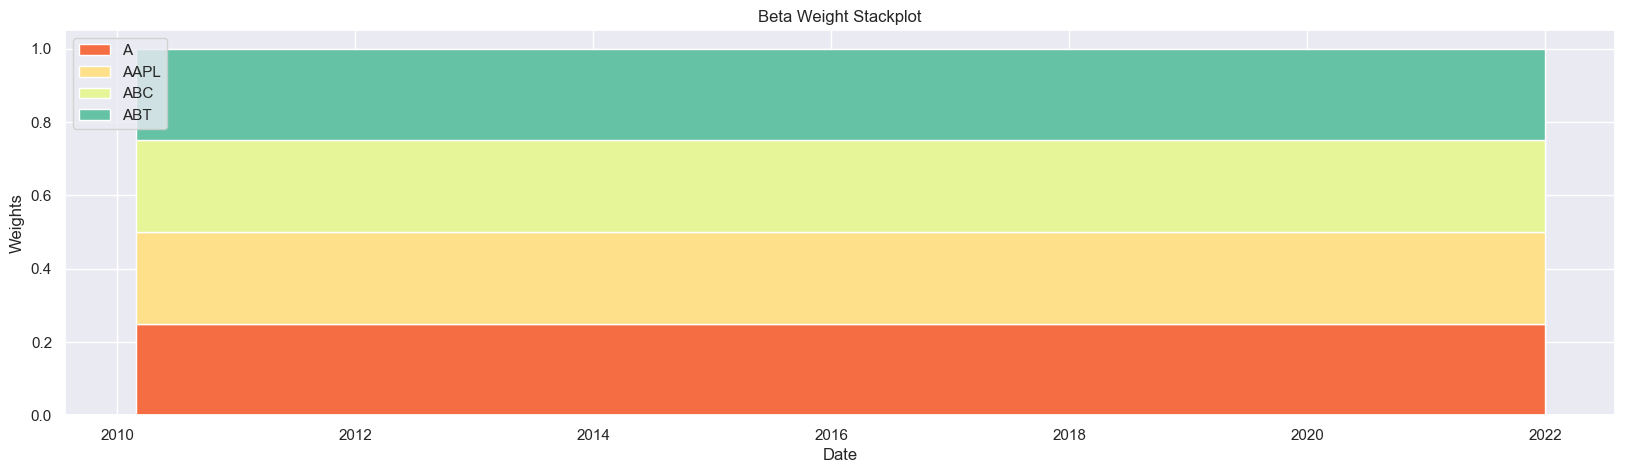

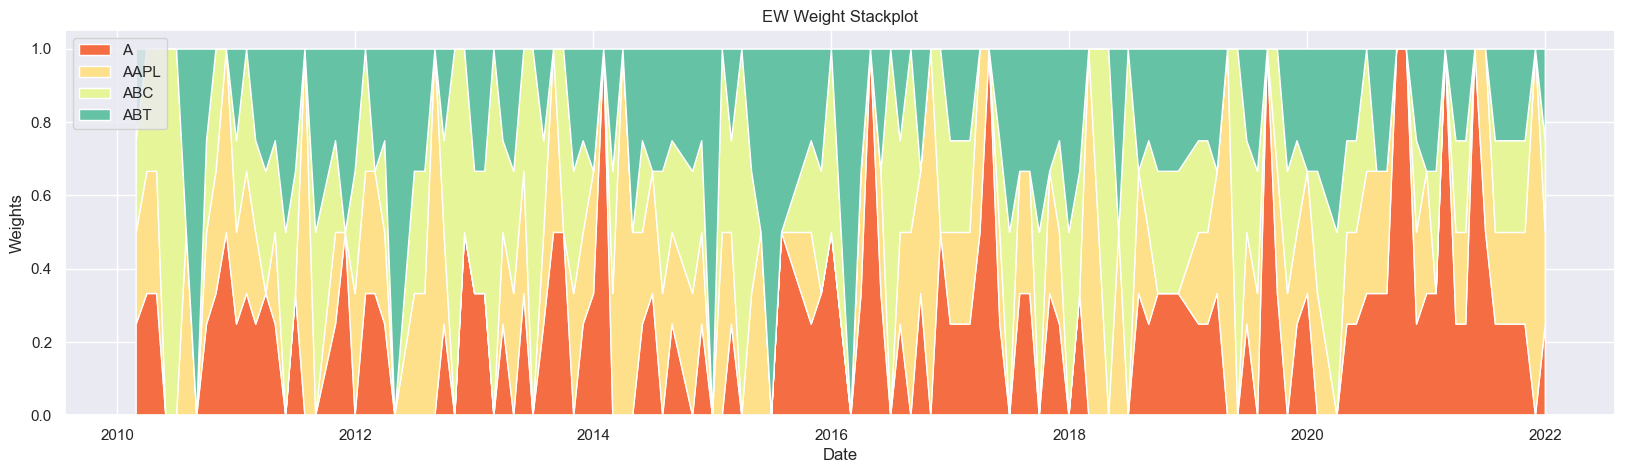

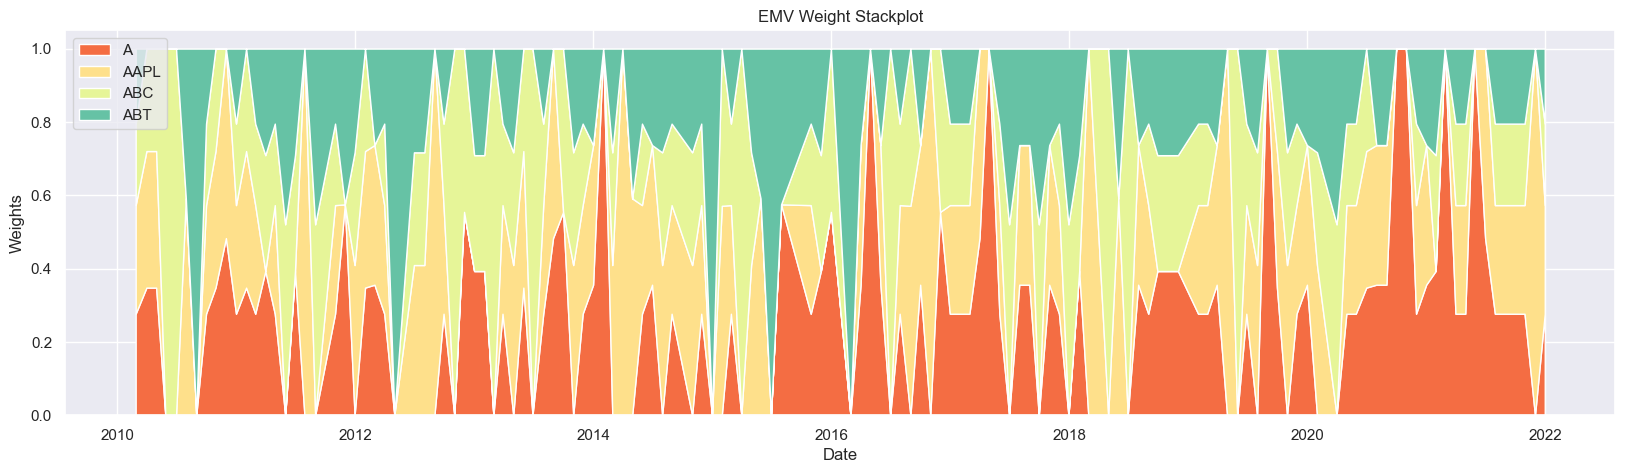

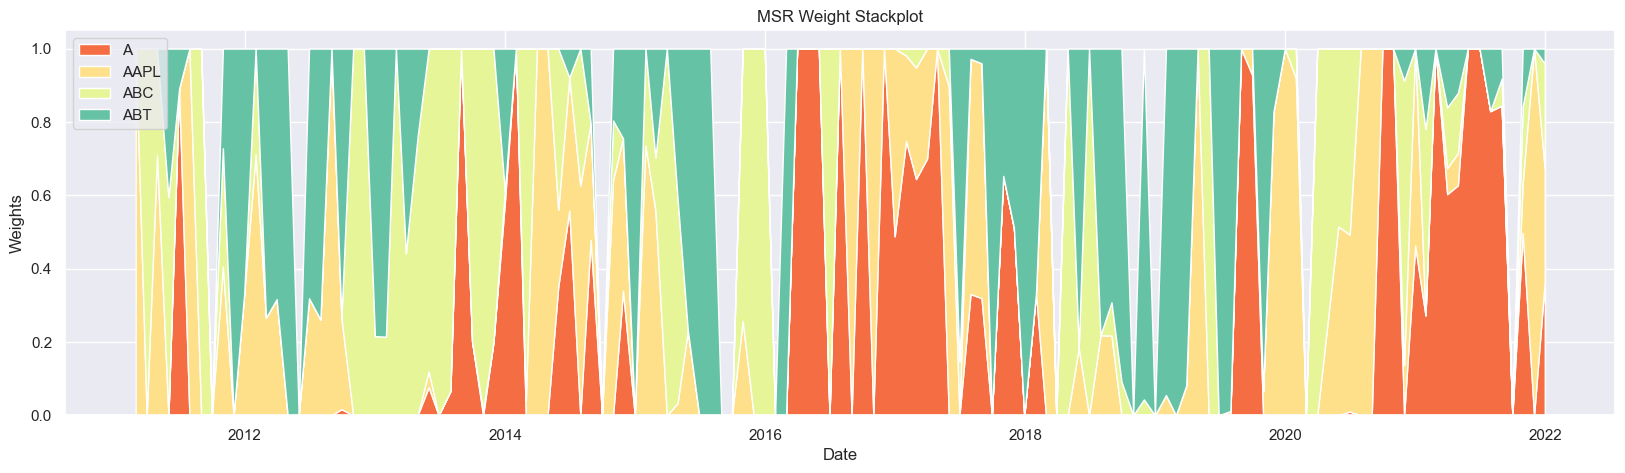

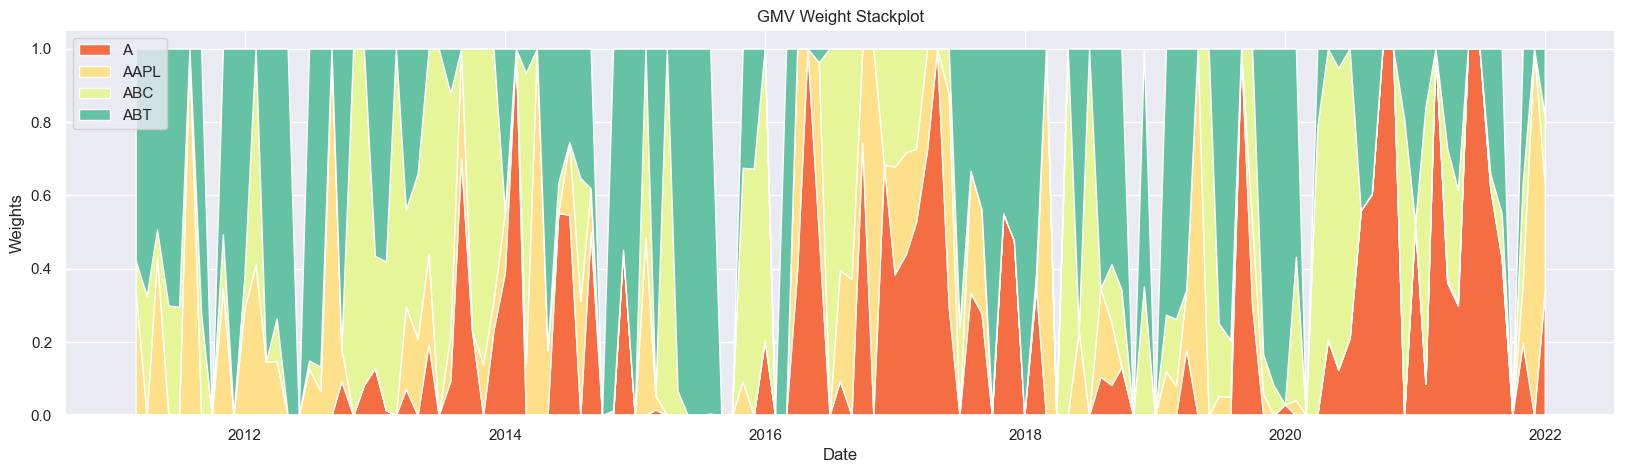

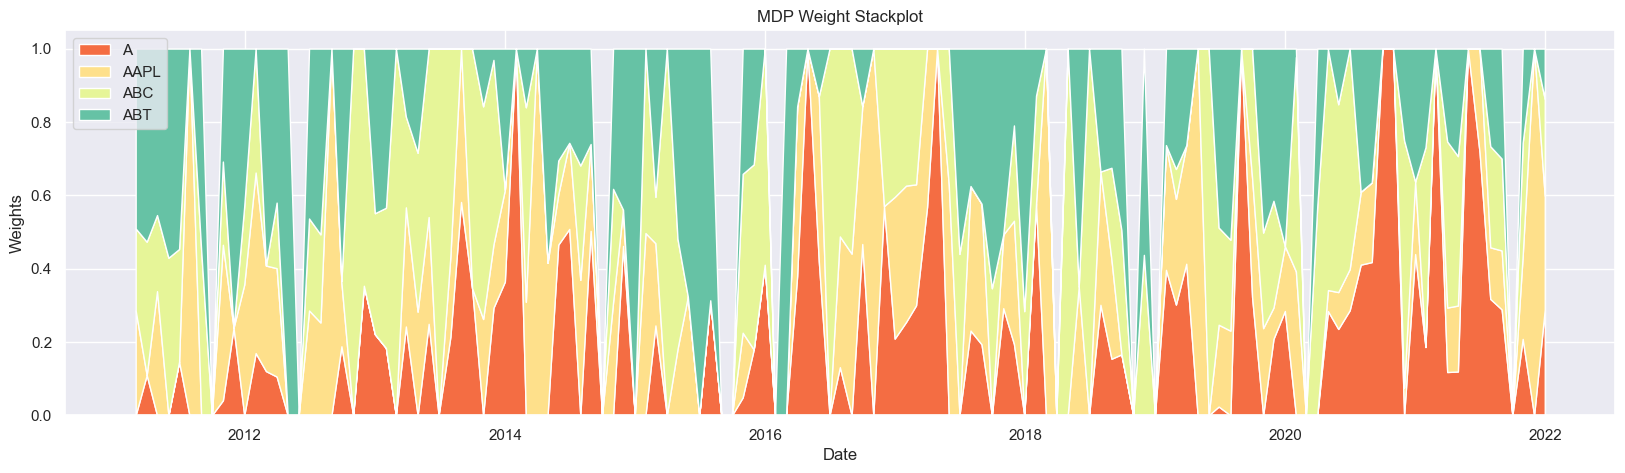

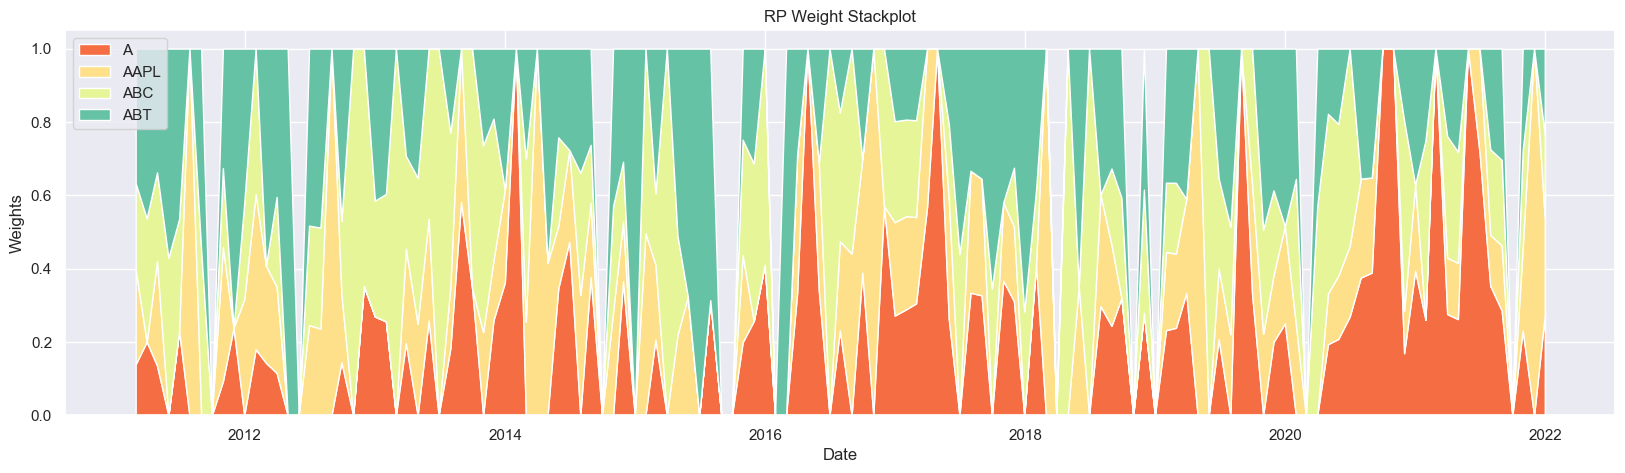

In [22]:
for name, cs in cs_model.items(): 
    weight_stackplot(cs, name=name)

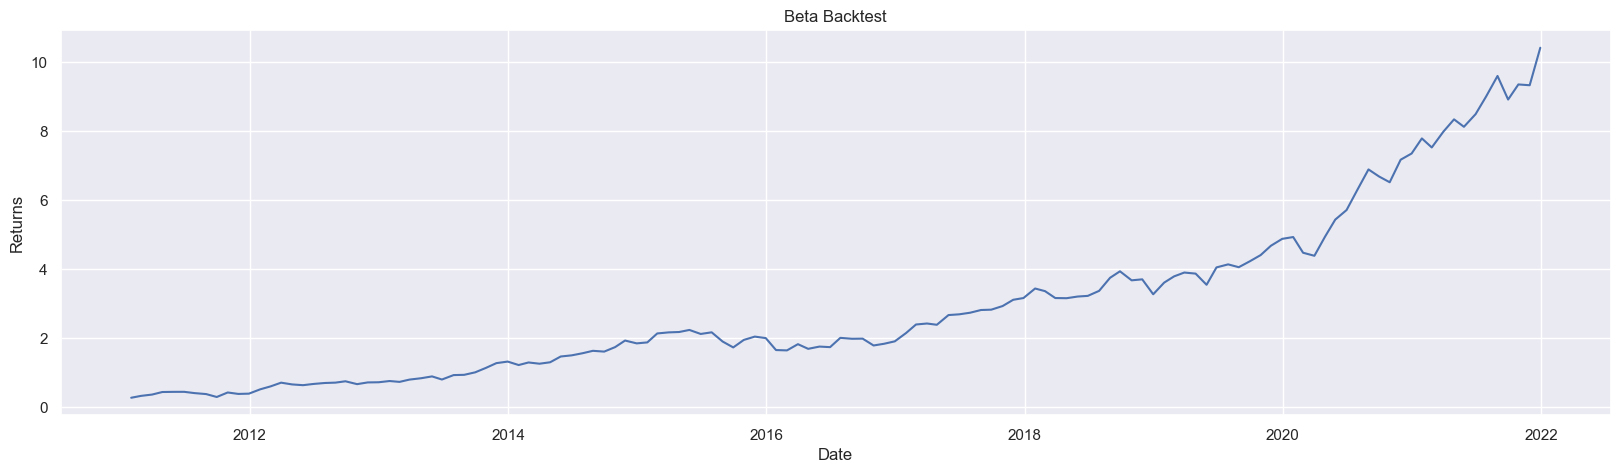

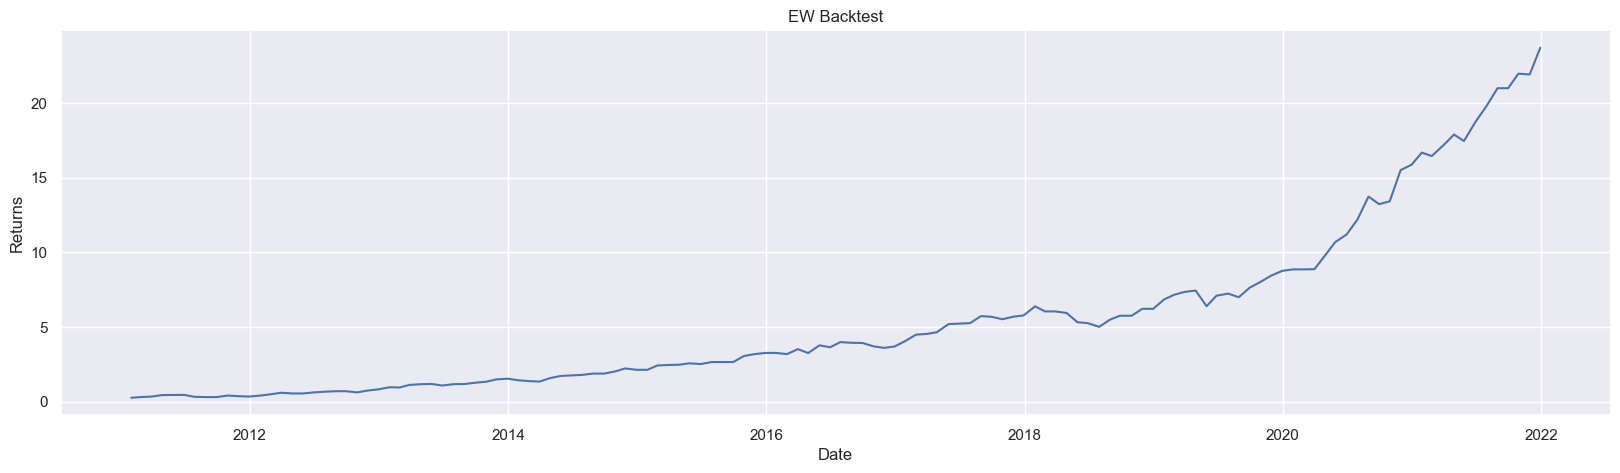

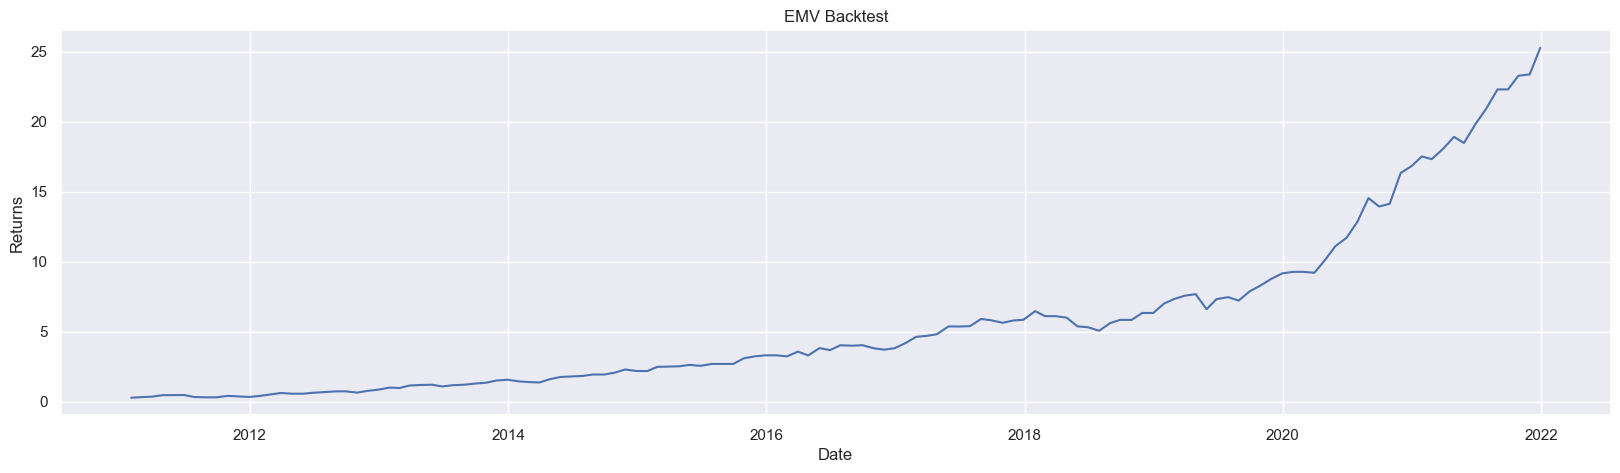

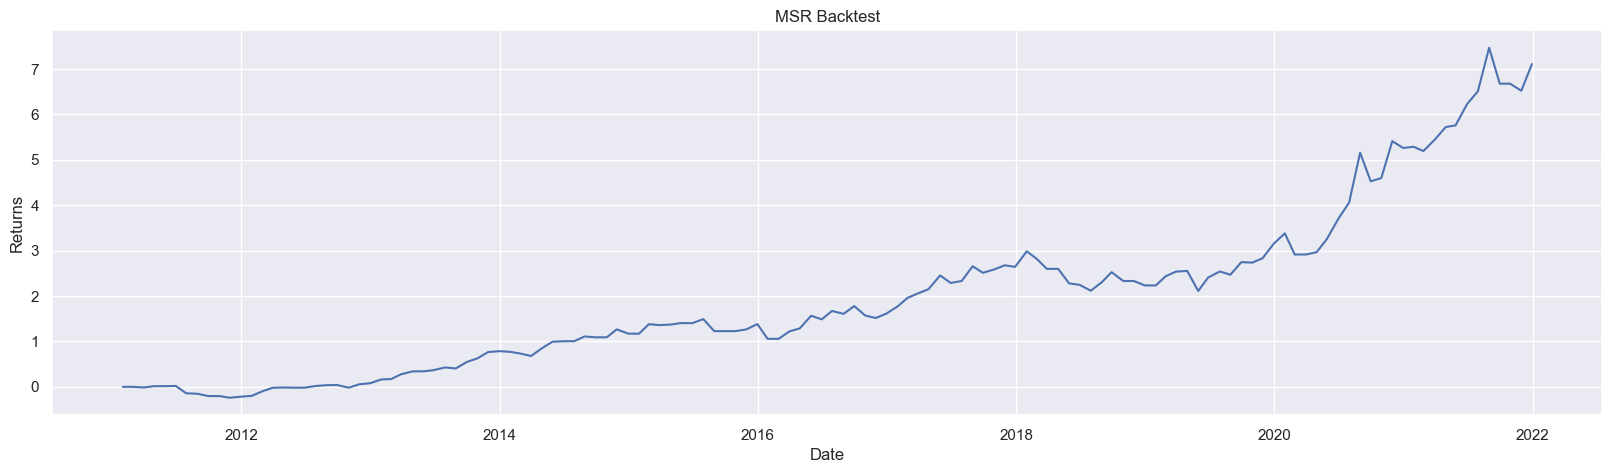

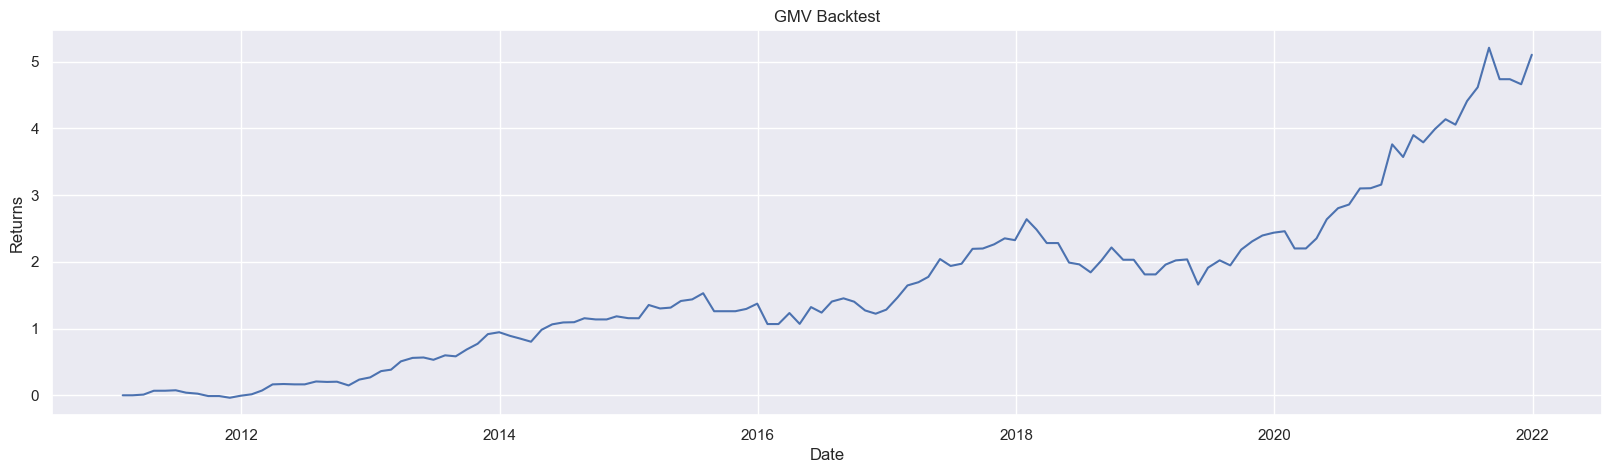

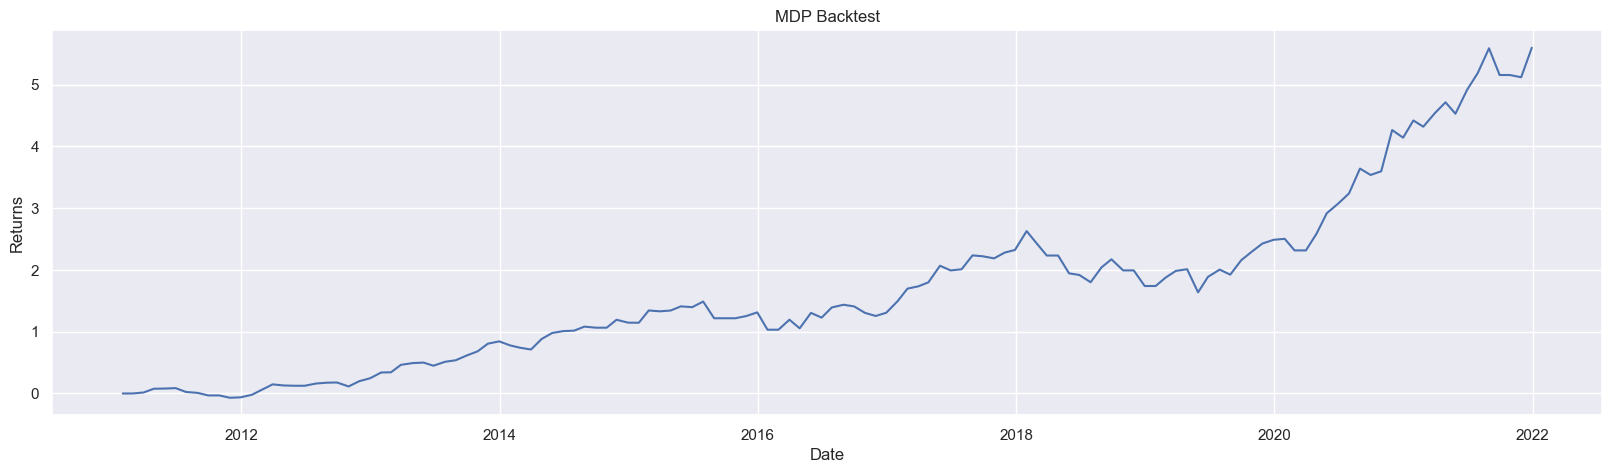

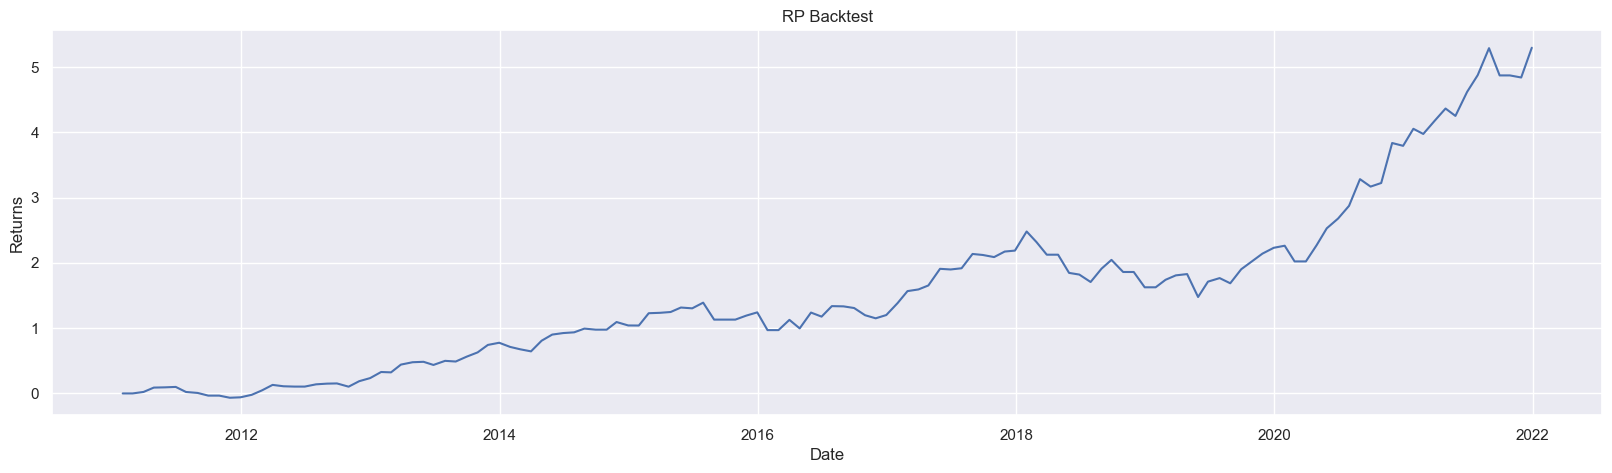

In [23]:
for name, cs in cs_model.items(): 
    port_val_plot(cs, rebal_price_df=test_rebal_price_df, name=name)

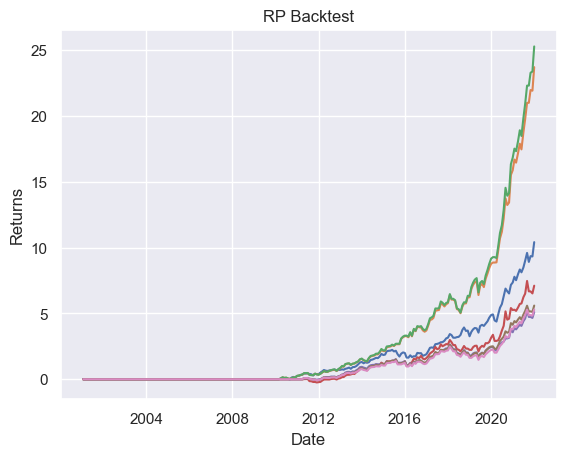

In [24]:
for name, cs in cs_model.items(): 
    port_val_total_plot(cs, rebal_price_df=rebal_price_df, name=name)

### Part5: Time Series -> to do

In [25]:
# TimeSeries의 변수로 들어갈 포트폴리오 리턴을 만든다. 
def port_val(weight_df, rebal_price_df): 
    
    # 포트폴리오 수익률 데이터프레임
    rets = rebal_price_df.pct_change().fillna(0)
    port_rets = weight_df * rets
    port_rets = port_rets.sum(axis=1)
    port_cum_rets = (1 + port_rets).cumprod() - 1
    
    return port_rets

port_rets = port_val(beta, test_rebal_price_df)
port_rets

2010-01-29    0.000000
2010-02-26    0.061182
2010-03-31    0.060878
2010-04-30    0.052865
2010-05-28   -0.044381
                ...   
2021-08-31    0.059048
2021-09-30   -0.064516
2021-10-29    0.044116
2021-11-30   -0.002217
2021-12-30    0.105238
Length: 144, dtype: float64

In [26]:
# 종적 자산배분 
test_ts = TimeSeries(port_rets=port_rets, param=12)
vt_weights = test_ts.vt()
cvt_weights = test_ts.cvt()
kl_weights = test_ts.kl()
cppi_weights = test_ts.cppi()

TypeError: __init__() missing 2 required positional arguments: 'cs_weight' and 'call_method'

In [ ]:
# 위험자산과 무위험 자산의 투자 비중 데이터프레임 생성
vt_weights_df = pd.concat([vt_weights, 1-vt_weights], axis=1, join='inner')
vt_weights_df.columns = ['PORTFOLIO', 'CASH']
vt_weights_df

,PORTFOLIO,CASH
2000-01-31,0.000000,1.000000
2000-02-29,0.000000,1.000000
2000-03-31,0.000000,1.000000
2000-04-28,0.000000,1.000000
2000-05-31,0.000000,1.000000
...,...,...
2021-08-31,0.661027,0.338973
2021-09-30,0.661503,0.338497
2021-10-29,0.637679,0.362321
2021-11-30,0.648631,0.351369


In [ ]:
  # 최종 포트폴리오 투자 가중치
cs_weights = beta
csts_port_weights = cs_weights.multiply(vt_weights, axis=0)
csts_port_weights['CASH'] = vt_weights_df['CASH']
csts_port_weights.sum(axis=1)

2000-01-31    1.0
2000-02-29    1.0
2000-03-31    1.0
2000-04-28    1.0
2000-05-31    1.0
             ... 
2021-08-31    1.0
2021-09-30    1.0
2021-10-29    1.0
2021-11-30    1.0
2021-12-30    1.0
Length: 264, dtype: float64

In [ ]:
port_rets

2000-01-31    0.000000
2000-02-29    0.010655
2000-03-31    0.105441
2000-04-28    0.011221
2000-05-31    0.010650
                ...   
2021-08-31    0.023263
2021-09-30   -0.037552
2021-10-29    0.057083
2021-11-30   -0.019257
2021-12-30    0.067468
Length: 264, dtype: float64

[]

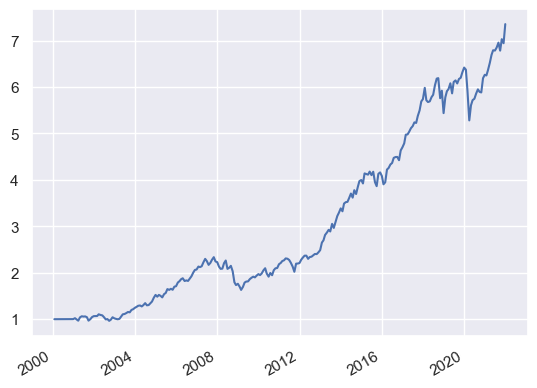

In [ ]:
# 최종 포트폴리오의 수익률 
test_rebal_price_df = add_cash(test_rebal_price_df, 252, 0.04)  
csts_port_rets = csts_port_weights * test_rebal_price_df.pct_change()#.dropna(inplace=True)
csts_port_cum_rets = (1+csts_port_rets.sum(axis=1)).cumprod().plot()
csts_port_cum_rets.plot()

Text(0, 0.5, 'Weights')

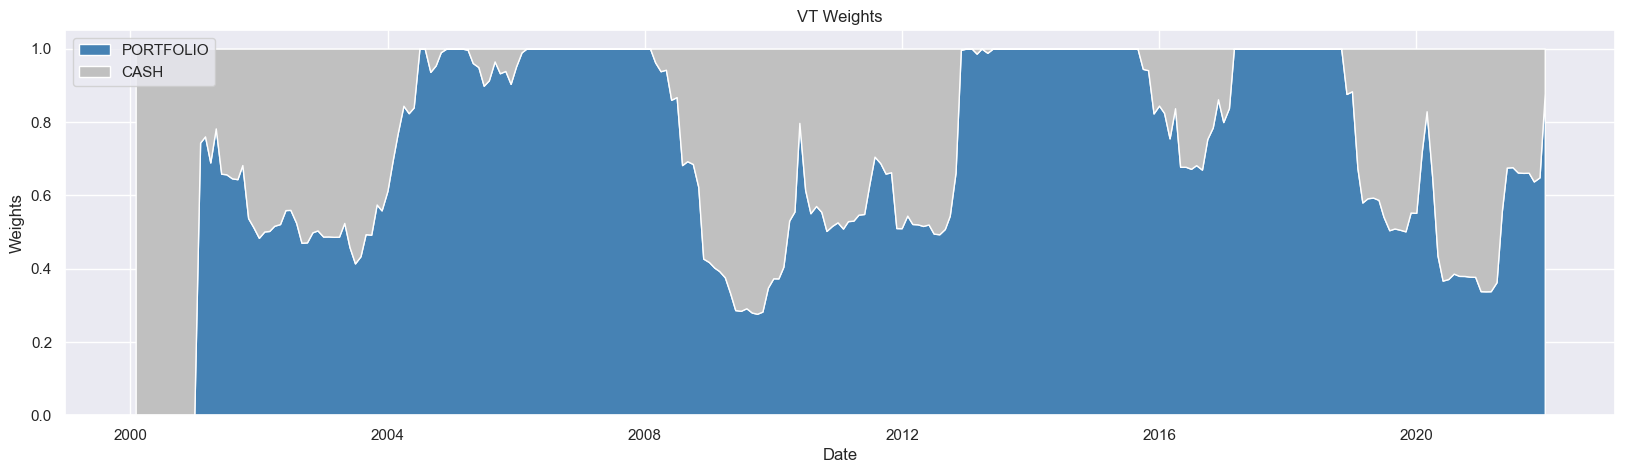

In [ ]:
# 시계열 플랏 시각화
plt.figure(figsize=(20, 5))
plt.stackplot(vt_weights_df.index, vt_weights_df.T, labels=vt_weights_df.columns, colors=['steelblue', 'silver'])
plt.legend(loc='upper left')
plt.title('VT Weights')
plt.xlabel('Date')
plt.ylabel('Weights')

### Part6: Market Regime Test -> to do

### Part7: MECE Test -> to do